In [1]:
## Importing all the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading the data
data = pd.read_csv("C:/Users/nikhi/Desktop/gaia_modified.csv")
data.head()

,Point,Corner,C1,L1,C2,L2,Pass/Fail,fc,PhaseMargin,GainMargin
0,1.0,nom,0.000001,0.00004,0.00001,0.000100,NaN,3.743e3,51.42,12.97
1,2.0,nom,0.000001,0.00004,0.00001,0.000080,NaN,3.704e3,52.94,21.31
2,3.0,nom,0.000001,0.00004,0.00001,0.000084,NaN,3.712e3,52.59,17.84
3,4.0,nom,0.000001,0.00004,0.00001,0.000089,NaN,3.719e3,52.22,15.34
4,5.0,nom,0.000001,0.00004,0.00001,0.000093,NaN,3.727e3,51.8,13.75


In [3]:
# Checking for size and shape
data.shape

(14641, 10)

In [4]:
# Checking for NULL/NA characters.
data.isna().sum()

Point              0
Corner             0
C1                 0
L1                 0
C2                 0
L2                 0
Pass/Fail      14641
fc                 0
PhaseMargin        0
GainMargin         0
dtype: int64

In [5]:
# Removing the column Pass/Fail
del data["Pass/Fail"]

In [6]:
data.head()

,Point,Corner,C1,L1,C2,L2,fc,PhaseMargin,GainMargin
0,1.0,nom,0.000001,0.00004,0.00001,0.000100,3.743e3,51.42,12.97
1,2.0,nom,0.000001,0.00004,0.00001,0.000080,3.704e3,52.94,21.31
2,3.0,nom,0.000001,0.00004,0.00001,0.000084,3.712e3,52.59,17.84
3,4.0,nom,0.000001,0.00004,0.00001,0.000089,3.719e3,52.22,15.34
4,5.0,nom,0.000001,0.00004,0.00001,0.000093,3.727e3,51.8,13.75


In [7]:
# Descriptive statistics
data.describe()

,Point,C1,L1,C2,L2
count,14641.000000,1.464100e+04,14641.000000,14641.000000,14641.000000
mean,7320.999932,1.000036e-06,0.000040,0.000010,0.000100
std,4226.637669,1.217813e-07,0.000005,0.000001,0.000012
min,1.000000,8.000000e-07,0.000032,0.000008,0.000080
25%,3661.000000,8.889000e-07,0.000036,0.000009,0.000089
50%,7321.000000,1.000000e-06,0.000040,0.000010,0.000100
75%,10980.000000,1.111000e-06,0.000044,0.000011,0.000111
max,14640.000000,1.200000e-06,0.000048,0.000012,0.000120


In [8]:
# Descriptive statistics of Gain and Phase Margin
data[["PhaseMargin","GainMargin"]].describe()

,PhaseMargin,GainMargin
count,14641,14641
unique,1187,3291
top,netl err,netl err
freq,3091,3091


In [9]:
# Making netl err value in Phase and Gain error to NA values
data["PhaseMargin"][data["PhaseMargin"]=='netl err'] = np.nan
data["GainMargin"][data["GainMargin"]=='netl err'] = np.nan

In [10]:
# Checking for NA values
data.isna().sum()

Point             0
Corner            0
C1                0
L1                0
C2                0
L2                0
fc                0
PhaseMargin    3091
GainMargin     3091
dtype: int64

In [11]:
# dropping all na value
data_cleaned = data.dropna()

In [12]:
# counting number of NA
data_cleaned.isna().sum()

Point          0
Corner         0
C1             0
L1             0
C2             0
L2             0
fc             0
PhaseMargin    0
GainMargin     0
dtype: int64

In [13]:
# Checking for data types
data_cleaned.dtypes

Point          float64
Corner          object
C1             float64
L1             float64
C2             float64
L2             float64
fc              object
PhaseMargin     object
GainMargin      object
dtype: object

In [14]:
#  converting phase and gain margin to Float
data_cleaned['PhaseMargin'] = data_cleaned['PhaseMargin'].astype(float)
data_cleaned['GainMargin'] = data_cleaned['GainMargin'].astype(float)

In [15]:
# Descriptive statistics
data_cleaned.describe()

,Point,C1,L1,C2,L2,PhaseMargin,GainMargin
count,11550.000000,1.155000e+04,11550.000000,11550.000000,11550.000000,11550.000000,11550.000000
mean,7017.519913,9.956189e-07,0.000040,0.000010,0.000100,51.438262,14.887883
std,4690.029105,1.356966e-07,0.000005,0.000001,0.000012,2.369442,5.015508
min,1.000000,8.000000e-07,0.000032,0.000008,0.000080,45.180000,-0.617900
25%,2888.250000,8.889000e-07,0.000036,0.000009,0.000089,49.740000,11.240000
50%,5775.500000,1.000000e-06,0.000040,0.000010,0.000100,51.330000,15.170000
75%,11750.000000,1.111000e-06,0.000044,0.000011,0.000111,53.050000,19.000000
max,14640.000000,1.200000e-06,0.000048,0.000012,0.000120,59.290000,26.590000


{'whiskers': [<matplotlib.lines.Line2D at 0x1bcf767d388>,
 'caps': [<matplotlib.lines.Line2D at 0x1bcf767dfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bcf766ea48>],
 'medians': [<matplotlib.lines.Line2D at 0x1bcf7687ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bcf7687fc8>],
 'means': []}

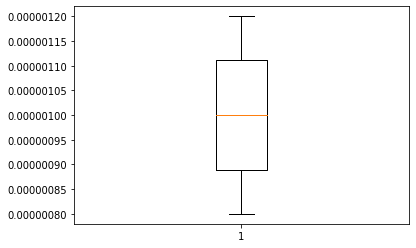

In [16]:
plt.boxplot(data_cleaned["C1"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bcf772d808>,
 'caps': [<matplotlib.lines.Line2D at 0x1bcf772dfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bcf7729d08>],
 'medians': [<matplotlib.lines.Line2D at 0x1bcf7734a48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bcf76a4448>],
 'means': []}

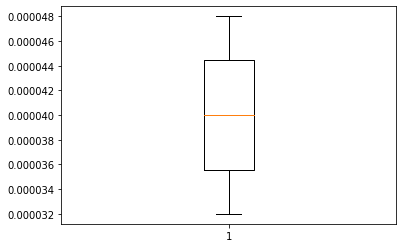

In [17]:
plt.boxplot(data_cleaned["L1"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bcf77a6e08>,
 'caps': [<matplotlib.lines.Line2D at 0x1bcf77abdc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bcf77a6348>],
 'medians': [<matplotlib.lines.Line2D at 0x1bcf77aee48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bcf776ae48>],
 'means': []}

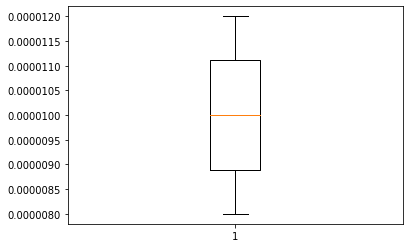

In [18]:
plt.boxplot(data_cleaned["C2"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bcf7819948>,
 'caps': [<matplotlib.lines.Line2D at 0x1bcf781f9c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bcf7815e48>],
 'medians': [<matplotlib.lines.Line2D at 0x1bcf7823ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bcf77d54c8>],
 'means': []}

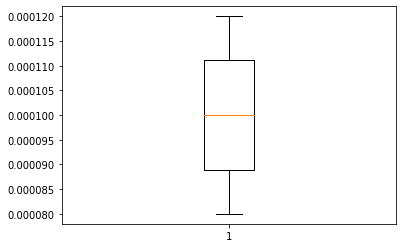

In [19]:
plt.boxplot(data_cleaned["L2"])

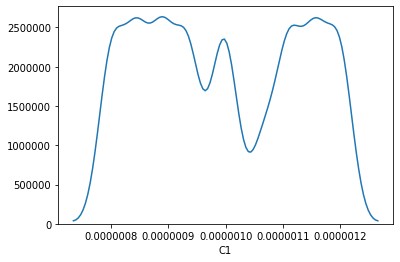

In [20]:
sns.distplot(data_cleaned["C1"],hist=False)

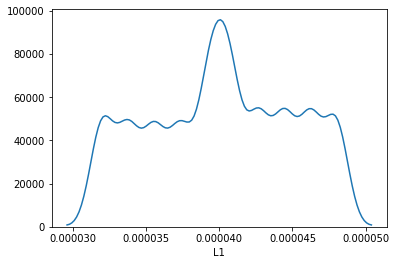

In [21]:
sns.distplot(data_cleaned["L1"],hist=False)

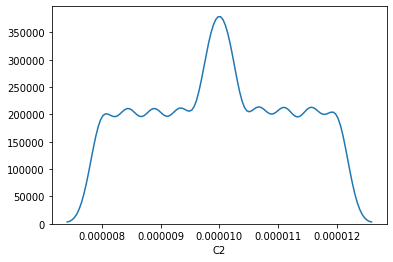

In [22]:
sns.distplot(data_cleaned["C2"],hist=False)

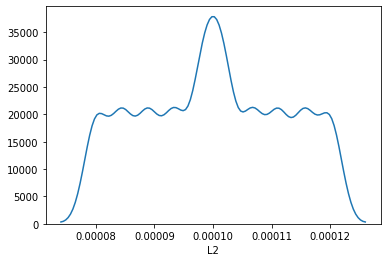

In [23]:
sns.distplot(data_cleaned["L2"],hist=False)

In [26]:
corr =data_cleaned.corr()
corr

,Point,C1,L1,C2,L2,PhaseMargin,GainMargin
Point,1.000000,8.627235e-01,9.988613e-02,9.041656e-03,5.844339e-04,-0.129191,-0.562638
C1,0.862724,1.000000e+00,2.711442e-02,2.189315e-03,1.699551e-08,-0.086182,-0.611663
L1,0.099886,2.711442e-02,1.000000e+00,-6.832886e-04,2.818449e-08,-0.655149,-0.520538
C2,0.009042,2.189315e-03,-6.832886e-04,1.000000e+00,5.666654e-08,-0.639308,0.204621
L2,0.000584,1.699551e-08,2.818449e-08,5.666654e-08,1.000000e+00,-0.386891,0.099908
PhaseMargin,-0.129191,-8.618234e-02,-6.551493e-01,-6.393075e-01,-3.868910e-01,1.000000,0.213098
GainMargin,-0.562638,-6.116631e-01,-5.205376e-01,2.046211e-01,9.990826e-02,0.213098,1.000000


[Text(0.5, 0, 'Point'),
 Text(1.5, 0, 'C1'),
 Text(2.5, 0, 'L1'),
 Text(3.5, 0, 'C2'),
 Text(4.5, 0, 'L2'),
 Text(5.5, 0, 'PhaseMargin'),
 Text(6.5, 0, 'GainMargin')]

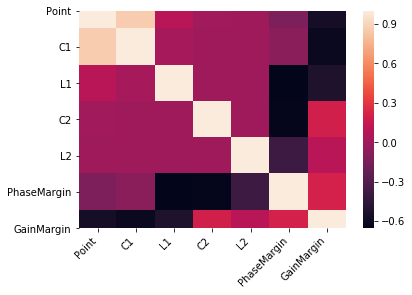

In [27]:
ax = sns.heatmap(
    corr
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [28]:
# Splitting into x and y
x= data_cleaned[["C1","L1","C2","L2"]]
y = data_cleaned[["PhaseMargin","GainMargin"]]

In [29]:
columns = x.columns

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)

In [31]:
#Splitting data into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(9240, 4) (9240, 2)
(2310, 4) (2310, 2)


In [32]:
from sklearn.model_selection import cross_val_score,KFold
rf_model = RandomForestRegressor(n_estimators=100,max_depth=40,random_state=0,min_samples_split=5)
model = MultiOutputRegressor(estimator=rf_model)
kfold = KFold(n_splits=3, random_state=10)
score = cross_val_score(model, x_test, y_test, cv=kfold, scoring='r2')
score #Cross validation accuracy

array([0.9773269 , 0.97561539, 0.9762109 ])

In [33]:
model.fit(x_train,y_train)#Fitting multi target regression(MTR)
model.score(x_test,y_test)#Finding accuracy

0.993337207602379

In [34]:
rf_model.fit(x_train,y_train)#Fitting random forest model
rf_model.score(x_test,y_test)#Finding accuracy of random forest model

0.9888766913644654

In [35]:
y_mult = model.predict(x_test)#Predicting y values using MTR
y_rf = rf_model.predict(x_test)#Predicting y values using random forest


('C1', 0.005756287143968176)
('L1', 0.4294751399368804)
('C2', 0.4121562607229007)
('L2', 0.15261231219625074)


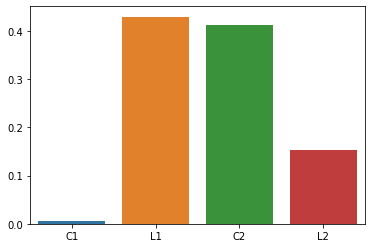

In [36]:
# Gain Margin
# Print the feature importance
for feature in zip(columns, model.estimators_[0].feature_importances_):
    print(feature)
sns.barplot(x=columns,y=model.estimators_[0].feature_importances_)    

In [37]:
rf_model.fit(x_train,y_train)
rf_model.score(x_test,y_test)

0.9888766913644654

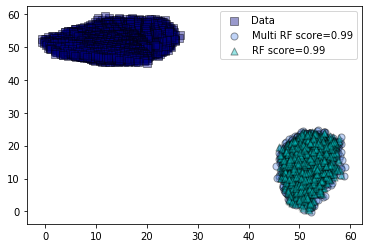

In [38]:
# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(y["GainMargin"], y["PhaseMargin"], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")

plt.scatter(y_mult[:, 0], y_mult[:, 1], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % model.score(x_test, y_test))

plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor='k',
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % rf_model.score(x_test, y_test))

plt.legend()
plt.show()

In [39]:
import xgboost as xgb

xgmodel = xgb.XGBRegressor(
		learning_rate = 0.01,
		n_estimators = 1200,
		max_depth = 15,
		min_child_weight = 3,
		gamma = 0.1,
		reg_lambda = 10,
		subsample = 0.8,
		reg_alpha = 1,
		colsample_bytree = 0.8,
		objective = 'reg:squarederror',
		nthread = -1,
		silent = False,
		scale_pos_weight = 1)
model = MultiOutputRegressor(estimator=xgmodel)
kfold = KFold(n_splits=3, random_state=10)
score = cross_val_score(model, x_test, y_test, cv=kfold, scoring='r2')
score 

array([0.98378922, 0.98388376, 0.98699765])

In [40]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.994389920668513

('C1', 0.55634147)
('L1', 0.24525507)
('C2', 0.040124625)
('L2', 0.15827887)


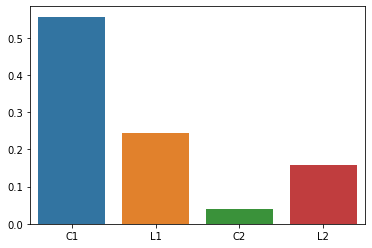

In [196]:
# Print the feature importance
for feature in zip(columns, model.estimators_[1].feature_importances_):
    print(feature)
sns.barplot(x=columns,y=model.estimators_[1].feature_importances_)

('C1', 0.0065921643)
('L1', 0.3612168)
('C2', 0.48243988)
('L2', 0.14975114)


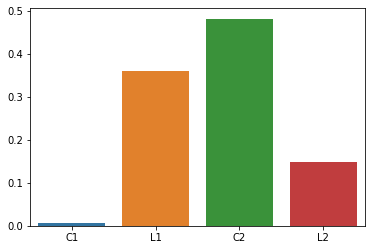

In [41]:
# Gain Margin
# Print the feature importance
for feature in zip(columns, model.estimators_[0].feature_importances_):
    print(feature)
sns.barplot(x=columns,y=model.estimators_[0].feature_importances_)   

In [42]:
y_multirf = model.predict(x_test)
y_rf=rf_model.predict(x_test)

In [43]:
from sklearn.neural_network import MLPRegressor   

model = MLPRegressor(solver='lbfgs',alpha=0.001,hidden_layer_sizes=(150,))
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9935091993884035

In [44]:
from keras.models import Sequential
from keras.layers import *

model = Sequential()
model.add(Dense(4, input_dim =4,  activation='relu',kernel_initializer="normal"))
model.add(Dense(4, activation='relu',kernel_initializer="normal"))
model.add(Dense(2, activation='linear',kernel_initializer="normal"))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["accuracy"])

model.fit(x_train, y_train, epochs=100, batch_size=100)
score = model.evaluate(x_test, y_test, batch_size=100)
print(score)

Using TensorFlow backend.


Epoch 1/100
9240/9240 [==============================] - 1s 129us/step - loss: 1444.6198 - accuracy: 0.9979
Epoch 2/100
9240/9240 [==============================] - 0s 32us/step - loss: 1422.7686 - accuracy: 0.7411
Epoch 3/100
9240/9240 [==============================] - 0s 45us/step - loss: 1347.5026 - accuracy: 0.0000e+00
Epoch 4/100
9240/9240 [==============================] - 0s 40us/step - loss: 1189.1939 - accuracy: 0.2619
Epoch 5/100
9240/9240 [==============================] - 0s 31us/step - loss: 966.3213 - accuracy: 1.0000
Epoch 6/100
9240/9240 [==============================] - 0s 39us/step - loss: 723.6560 - accuracy: 1.0000
Epoch 7/100
9240/9240 [==============================] - 0s 33us/step - loss: 485.3039 - accuracy: 1.0000
Epoch 8/100
9240/9240 [==============================] - 0s 42us/step - loss: 292.3803 - accuracy: 1.0000
Epoch 9/100
9240/9240 [==============================] - 0s 31us/step - loss: 158.1436 - accuracy: 1.0000
Epoch 10/100
9240/9240 [=============

In [45]:
ypred_ann=model.predict(x_test)

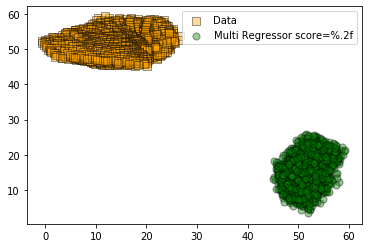

In [46]:
plt.figure()
s = 50
a = 0.4
plt.scatter(y["GainMargin"], y["PhaseMargin"], edgecolor='k',
            c="orange", s=s, marker="s", alpha=a, label="Data")

plt.scatter(ypred_ann[:, 0], ypred_ann[:, 1], edgecolor='k',
            c="green", s=s, alpha=a,
            label="Multi Regressor score=%.2f")

plt.legend()
plt.show()

In [47]:
data_cleaned[["fc"]].describe()

,fc
count,11550
unique,1132
top,3.768e3
freq,27


In [48]:
#fc is the only feature left out which can be used.
a= data_cleaned[["C1","L1","C2","L2"]]
b = data_cleaned[["PhaseMargin","GainMargin","fc"]]

In [49]:
columns1=a.columns

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a= sc.fit_transform(a)

In [51]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2)#Split data into test and training set
print (a_train.shape, b_train.shape)
print (a_test.shape, b_test.shape)

(9240, 4) (9240, 3)
(2310, 4) (2310, 3)


In [52]:
from sklearn.model_selection import cross_val_score,KFold
rf_model = RandomForestRegressor(n_estimators=100,max_depth=40,random_state=0,min_samples_split=5)
model = MultiOutputRegressor(estimator=rf_model)
kfold = KFold(n_splits=3, random_state=10)
score = cross_val_score(model, a_test, b_test, cv=kfold, scoring='r2')
score

array([0.98334311, 0.9841662 , 0.98253471])

In [53]:
model.fit(a_train,b_train)#MTR model fitting
model.score(a_test,b_test)#MTR model accuracy

0.9952343403236096

In [54]:
rf_model.fit(a_train,b_train)#Random forest fitting
rf_model.score(a_test,b_test)#Random forest accuracy-an increase of 1%-better model

0.999450224131177

In [55]:
b_mult = model.predict(a_test)
b_rf = rf_model.predict(a_test)

('C1', 0.00572917278423034)
('L1', 0.4356956421881264)
('C2', 0.4073094717664314)
('L2', 0.15126571326121174)


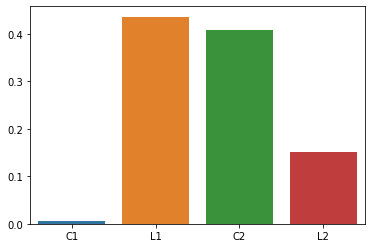

In [56]:
# Gain Margin
# Print the feature importance
for feature in zip(columns1, model.estimators_[0].feature_importances_):
    print(feature)
sns.barplot(x=columns1,y=model.estimators_[0].feature_importances_)    

('C1', 0.5252614130464813)
('L1', 0.24760152357848483)
('C2', 0.05089649744180833)
('L2', 0.17624056593322548)


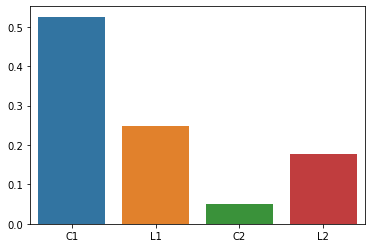

In [57]:
# Phase Margin
# Print the feature importance
for feature in zip(columns1, model.estimators_[1].feature_importances_):
    print(feature)
sns.barplot(x=columns1,y=model.estimators_[1].feature_importances_)    

In [58]:
rf_model.fit(a_train,b_train)
rf_model.score(a_test,b_test)

0.999450224131177

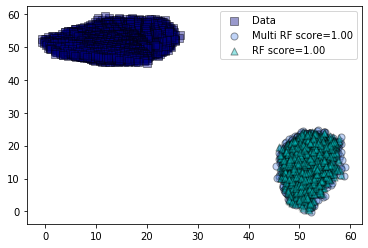

In [59]:
# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(y["GainMargin"], y["PhaseMargin"], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")

plt.scatter(y_mult[:, 0], y_mult[:, 1], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % model.score(a_test, b_test))

plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor='k',
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % rf_model.score(a_test, b_test))

plt.legend()
plt.show()


In [60]:
from xgboost.sklearn import XGBRegressor

xgmodel = XGBRegressor(
		learning_rate = 0.01,
		n_estimators = 1200,
		max_depth = 15,
		min_child_weight = 3,
		gamma = 0.1,
		reg_lambda = 10,
		subsample = 0.8,
		reg_alpha = 1,
		colsample_bytree = 0.8,
		objective = 'reg:squarederror',
		nthread = -1,
		silent = False,
		scale_pos_weight = 1)
model = MultiOutputRegressor(estimator=xgmodel)
kfold = KFold(n_splits=3, random_state=10)
score = cross_val_score(model, a_test, b_test, cv=kfold, scoring='r2')
score#Cross validation score-xgboost

array([0.98982872, 0.99038551, 0.98815947])

In [61]:
model.fit(a_train,b_train)#MTR model fitting
model.score(a_test,b_test)#MTR model accuracy

0.9961441707433308

('C1', 0.55813885)
('L1', 0.24687801)
('C2', 0.039689437)
('L2', 0.15529369)


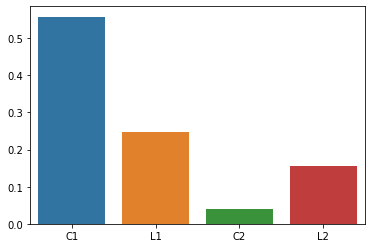

In [62]:
# Print the feature importance
for feature in zip(columns1, model.estimators_[1].feature_importances_):
    print(feature)
sns.barplot(x=columns1,y=model.estimators_[1].feature_importances_)

In [218]:
y_multirf = model.predict(a_test)
y_rf=rf_model.predict(a_test)

In [219]:
                 
from sklearn.neural_network import MLPRegressor   #Multilayer perceptron model using selected features

model = MLPRegressor(solver='lbfgs',alpha=0.001,hidden_layer_sizes=(150,))
model.fit(a_train,b_train)
model.score(a_test,b_test)

0.999636203372224

In [220]:
from keras.models import Sequential
from keras.layers import *

model = Sequential()
model.add(Dense(4, input_dim =4,  activation='relu',kernel_initializer="normal"))
model.add(Dense(4, activation='relu',kernel_initializer="normal"))
model.add(Dense(3, activation='linear',kernel_initializer="normal"))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["accuracy"])

model.fit(a_train, b_train, epochs=100, batch_size=100)
score = model.evaluate(a_test, b_test, batch_size=100)
print(score)

Epoch 1/100
9240/9240 [==============================] - 0s 41us/step - loss: 4737879.9697 - accuracy: 0.9410
Epoch 2/100
9240/9240 [==============================] - 0s 11us/step - loss: 4737434.5335 - accuracy: 1.0000
Epoch 3/100
9240/9240 [==============================] - 0s 11us/step - loss: 4736366.8193 - accuracy: 1.0000
Epoch 4/100
9240/9240 [==============================] - 0s 13us/step - loss: 4734219.7392 - accuracy: 1.0000
Epoch 5/100
9240/9240 [==============================] - 0s 16us/step - loss: 4730589.0162 - accuracy: 1.0000
Epoch 6/100
9240/9240 [==============================] - 0s 17us/step - loss: 4725119.2316 - accuracy: 1.0000
Epoch 7/100
9240/9240 [==============================] - 0s 17us/step - loss: 4717500.0097 - accuracy: 1.0000
Epoch 8/100
9240/9240 [==============================] - 0s 18us/step - loss: 4707483.8766 - accuracy: 1.0000
Epoch 9/100
9240/9240 [==============================] - 0s 19us/step - loss: 4694804.1667 - accuracy: 1.0000
Epoch 10/1

Epoch 75/100
9240/9240 [==============================] - 0s 12us/step - loss: 611044.9849 - accuracy: 1.0000
Epoch 76/100
9240/9240 [==============================] - 0s 17us/step - loss: 577081.5637 - accuracy: 1.0000
Epoch 77/100
9240/9240 [==============================] - 0s 16us/step - loss: 544254.3914 - accuracy: 1.0000
Epoch 78/100
9240/9240 [==============================] - 0s 19us/step - loss: 512591.8461 - accuracy: 1.0000
Epoch 79/100
9240/9240 [==============================] - 0s 24us/step - loss: 482212.7764 - accuracy: 1.0000
Epoch 80/100
9240/9240 [==============================] - 0s 20us/step - loss: 453121.6521 - accuracy: 1.0000
Epoch 81/100
9240/9240 [==============================] - 0s 15us/step - loss: 425253.8028 - accuracy: 1.0000
Epoch 82/100
9240/9240 [==============================] - 0s 16us/step - loss: 398811.9178 - accuracy: 1.0000
Epoch 83/100
9240/9240 [==============================] - 0s 14us/step - loss: 373652.6668 - accuracy: 1.0000
Epoch 84/1

In [221]:
bpred_ann=model.predict(a_test)

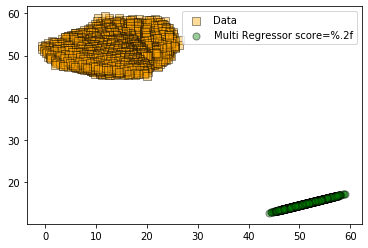

In [222]:
plt.figure()
s = 50
a = 0.4
plt.scatter(y["GainMargin"], y["PhaseMargin"], edgecolor='k',
            c="orange", s=s, marker="s", alpha=a, label="Data")

plt.scatter(ypred_ann[:, 0], ypred_ann[:, 1], edgecolor='k',
            c="green", s=s, alpha=a,
            label="Multi Regressor score=%.2f")

plt.legend()
plt.show()